In [7]:
import pandas as pd
import numpy as np



In [8]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sub_df = pd.read_csv("sample_submission.csv")

In [9]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [10]:
train_df['stroke'].unique()

array([0, 1], dtype=int64)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [12]:
train_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [13]:
train_df.nunique()

id                   15304
gender                   3
age                    106
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

In [14]:
train_df.duplicated().sum()

0

In [15]:
#data cleaning

sorted(train_df['age'].unique().tolist())[0:12]

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.68, 0.72, 0.8, 0.88]

In [16]:
train_df['age'] = np.ceil(train_df['age'])
test_df['age'] = np.ceil(test_df['age'])

In [17]:
train_df['gender'].value_counts()

gender
Female    9446
Male      5857
Other        1
Name: count, dtype: int64

In [18]:
train_df.drop(train_df[train_df['gender']=='Other'].index, inplace=True)
test_df.drop(test_df[test_df['gender']=='Other'].index, inplace=True)

In [19]:
#Exploratory data analysis(EDA)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

sns.set_style("darkgrid")


In [20]:
plot_color = ['#008180', 'red']
sns.set_palette(['#001080', 'red'])

In [21]:
#filter data for  stroke and non stroke
no_stroke_data = train_df[train_df['stroke']==0]
stroke_data = train_df[train_df['stroke']==1 ]

In [22]:
#univariate analysis

stroke_count = train_df['stroke'].value_counts()

In [23]:
stroke_count

stroke
0    14671
1      632
Name: count, dtype: int64

In [24]:
 # Assuming stroke_count is a Pandas DataFrame or Series
plot_color = ['#FF5733', 'red', '#FFA07A','Light Salmon']
fig = px.pie(
    stroke_count, 
    values=stroke_count.values,  # Use actual values
    names=stroke_count.index,    # Use index as labels
    title="Proportion of Stroke Cases",
    color_discrete_sequence=plot_color # Ensure plot_color is defined
)

# Update layout
fig.update_layout(
    legend_title_text="Stroke status", 
    title_x=0.35, 
    title_y=0.95
)

# Display the pie chart
fig.show()


In [25]:
def custom_histogram(column: str, titles: list) -> go.Figure:
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['No Stroke', 'Yes Stroke']) 
    histogram_no_stroke = px.histogram(no_stroke_data, x=column, color_discrete_sequence=['Light Sea Green'])
    histogram_stroke = px.histogram(stroke_data, x=column, color_discrete_sequence=['Salmon'])
    
    for trace in histogram_no_stroke.data:
        fig.add_trace(trace, row=1, col=1)

    for trace in histogram_stroke.data:
        fig.add_trace(trace, row=1, col=2)

    
    fig.update_layout(title=titles[0], title_x=0.5)
    fig.update_xaxes(title_text=titles[1], row=1, col=1)
    fig.update_xaxes(title_text=titles[1], row=1, col=2)
    fig.update_yaxes(title_text='Count', row=1, col=1)
    fig.update_yaxes(title_text='Count', row=1, col=2)

    return fig


In [26]:

fig = custom_histogram('avg_glucose_level', ['Average Glucose Level Distribution by Stroke', 'Average Glucose Level'])
fig.show()


In [27]:

fig = custom_histogram('age', ['Age Distribution by Stroke', 'Age'])
fig.show()


In [28]:
stroke_data['bmi'].mean()

30.230696202531643

In [29]:
no_stroke_data['bmi'].mean()

28.02217163110899

In [30]:

fig = px.violin(train_df, y = 'bmi', x = 'stroke', box = True, width = 700, height = 500, color_discrete_sequence=plot_color,
                title = 'BMI and Stroke Status',
                labels = {'stroke': 'Stroke status', 'bmi' : 'BMI'})
fig.update_layout(title_x = 0.3, title_y = 0.9)
fig.show()

In [31]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

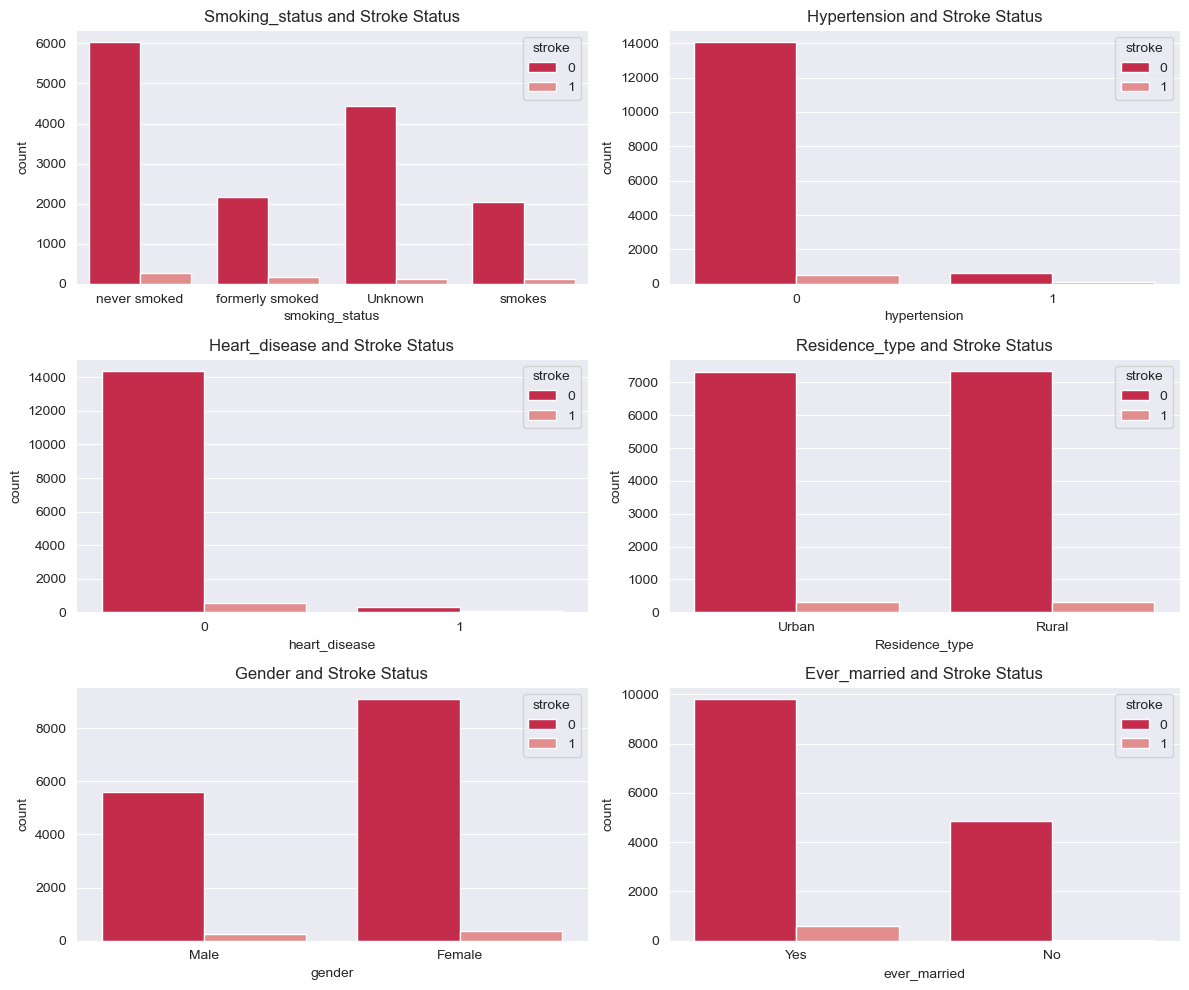

In [32]:
x_values = ['smoking_status', 'hypertension', 'heart_disease', 'Residence_type', 'gender', 'ever_married']
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12,10))

for ax, x_value in zip(axis.flat, x_values):
    sns.countplot(data=train_df, x=x_value, hue='stroke', ax=ax, palette=['#DC143C', '#F08080'])
    ax.set_title(f'{x_value.capitalize()} and Stroke Status')

plt.tight_layout()
plt.show()


In [33]:
#Data preparation and preprocessing
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

set_config(display = "diagram")

In [34]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [35]:
input_cols = list(train_df.columns)[1:-1]

In [36]:
target_col = 'stroke'

In [37]:
input_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [38]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

test_inputs = test_df[input_cols].copy()

In [39]:
numerical_cols = train_inputs.select_dtypes(include = np.number).columns.to_list()

In [40]:
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [41]:
categorical_cols = train_inputs.select_dtypes(include = 'object').columns.to_list()

In [42]:
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [43]:
train_df.nunique()

id                   15303
gender                   2
age                     82
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

In [44]:
categorical_cols.remove('smoking_status')

In [45]:
train_df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [46]:
ordinal_enc = OrdinalEncoder(categories=[['Unknown', 'never smoked', 'formerly smoked', 'smokes']])

In [47]:
onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [48]:
preprocessor = ColumnTransformer([
    ('Ordinal_Encode', ordinal_enc, ['smoking_status']),
    ('OneHot_Encode', onehot_enc, categorical_cols)
])

In [49]:
preprocessor.fit(train_inputs)


ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [50]:
encoded_cols = list(preprocessor.get_feature_names_out())

In [51]:
encoded_cols

['Ordinal_Encode__smoking_status',
 'OneHot_Encode__gender_Female',
 'OneHot_Encode__gender_Male',
 'OneHot_Encode__ever_married_No',
 'OneHot_Encode__ever_married_Yes',
 'OneHot_Encode__work_type_Govt_job',
 'OneHot_Encode__work_type_Never_worked',
 'OneHot_Encode__work_type_Private',
 'OneHot_Encode__work_type_Self-employed',
 'OneHot_Encode__work_type_children',
 'OneHot_Encode__Residence_type_Rural',
 'OneHot_Encode__Residence_type_Urban']

In [52]:
train_inputs[encoded_cols] = preprocessor.transform(train_inputs)
test_inputs[encoded_cols] = preprocessor.transform(test_inputs)

In [53]:
X_train = train_inputs[numerical_cols + encoded_cols]
y_train = train_df[target_col]

X_test = test_inputs[numerical_cols + encoded_cols]

In [54]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encode__smoking_status,OneHot_Encode__gender_Female,OneHot_Encode__gender_Male,OneHot_Encode__ever_married_No,OneHot_Encode__ever_married_Yes,OneHot_Encode__work_type_Govt_job,OneHot_Encode__work_type_Never_worked,OneHot_Encode__work_type_Private,OneHot_Encode__work_type_Self-employed,OneHot_Encode__work_type_children,OneHot_Encode__Residence_type_Rural,OneHot_Encode__Residence_type_Urban
0,28.0,0,0,79.53,31.1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33.0,0,0,78.44,23.9,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42.0,0,0,103.00,40.3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56.0,0,0,64.87,28.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,24.0,0,0,73.36,28.8,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [55]:
X_train.shape[1] == X_test.shape[1]

True

In [56]:
# Split Dataset into training and validation set
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [58]:
X_train.shape

(12242, 17)

In [59]:
# Baseline Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [60]:
models = [
    ( LogisticRegression(), 'LogisticRegression'),
    (RandomForestClassifier(), 'RandomForestClassifier'),
    (XGBClassifier(), 'XGBClassifier'),
    (LGBMClassifier(verbose = 1), 'LigthBGM')
]

In [61]:
def evalue_model(model,X_train, y_train,X_val, y_val):
    y_pred = model.predict(X_val)
    confusion_mat = confusion_matrix(y_val,y_pred)
    accuracy = accuracy_score(y_val,y_pred)
    precision = precision_score(y_val,y_pred)
    recall = recall_score(y_val,y_pred)
    f1 = f1_score(y_val,y_pred)
    return confusion_mat,accuracy,precision,recall,f1

In [62]:
confusion_mats = {}
def metric_df(model, model_name):
    confusion_mat, *df = evalue_model(model, X_train, y_train, X_val, y_val)
    confusion_mats[model_name] = confusion_mat
    df = [df]
    model_metrics = pd.DataFrame(data = df, columns=['Accuarcy','Precision', 'Recall', 'F1'])
    model_metrics.insert(0, 'Model', model_name)
    
    return model_metrics

In [63]:
predictions = []
for model,model_name in models:
    model.fit(X_train,y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

c:\Users\B santosh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [64]:
predictions

[                Model  Accuarcy  Precision    Recall        F1
 0  LogisticRegression  0.954917        0.3  0.022388  0.041667,
                     Model  Accuarcy  Precision    Recall        F1
 0  RandomForestClassifier   0.95361       0.25  0.029851  0.053333,
            Model  Accuarcy  Precision    Recall        F1
 0  XGBClassifier   0.95361   0.388889  0.104478  0.164706,
       Model  Accuarcy  Precision    Recall        F1
 0  LigthBGM   0.95459   0.380952  0.059701  0.103226]

In [65]:
oversample = SMOTE()
X_train_ns, y_train_ns = oversample.fit_resample(X_train,y_train)

In [66]:
X_train_ns.shape

(23488, 17)

In [67]:
lr_with_smote = LogisticRegression()
lr_with_smote.fit(X_train_ns, y_train_ns)
lr_with_smote_mat = metric_df(lr_with_smote, 'Logistic With SMOTE')
predictions.append(lr_with_smote_mat)

c:\Users\B santosh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [68]:
for model_name, confusion_mat in confusion_mats.items():
    print(f'Confusion Matrix for {model_name}')
    print(confusion_mat)
    print()

Confusion Matrix for LogisticRegression
[[2920    7]
 [ 131    3]]

Confusion Matrix for RandomForestClassifier
[[2915   12]
 [ 130    4]]

Confusion Matrix for XGBClassifier
[[2905   22]
 [ 120   14]]

Confusion Matrix for LigthBGM
[[2914   13]
 [ 126    8]]

Confusion Matrix for Logistic With SMOTE
[[2330  597]
 [  32  102]]



In [69]:
#Voting classifier hard and soft
from sklearn.ensemble import VotingClassifier

In [70]:
estimator = []
estimator.append(('LogisticRegression', LogisticRegression())), 
estimator.append(('RandomForestClassifier', RandomForestClassifier())), 
estimator.append(('XGBClassifier', XGBClassifier())), 
estimator.append(('LightGBM', LGBMClassifier(verbose = 1)))

In [71]:
VC_hard = VotingClassifier(estimators=estimator, voting='hard')
VC_hard.fit(X_train, y_train)
VC_hard_mat = metric_df(VC_hard, 'VC_HARD')
predictions.append(VC_hard_mat)

c:\Users\B santosh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [72]:
VC_hard_mat

,Model,Accuarcy,Precision,Recall,F1
0,VC_HARD,0.955897,0.444444,0.029851,0.055944


In [73]:
VC_soft = VotingClassifier(estimators=estimator, voting='soft')
VC_soft.fit(X_train, y_train)
VC_soft_mat = metric_df(VC_soft, 'VC_soft')
predictions.append(VC_soft_mat)

c:\Users\B santosh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [74]:
VC_soft_mat

,Model,Accuarcy,Precision,Recall,F1
0,VC_soft,0.956223,0.5,0.052239,0.094595


In [75]:
prediction_base = pd.concat(predictions, ignore_index=True, sort =False)
prediction_base = prediction_base.sort_values(by=['Recall'], ascending=False).style.hide(axis = 'index')

In [76]:
prediction_base

Model,Accuarcy,Precision,Recall,F1
Logistic With SMOTE,0.794512,0.145923,0.761194,0.244898
XGBClassifier,0.953610,0.388889,0.104478,0.164706
LigthBGM,0.954590,0.380952,0.059701,0.103226
VC_soft,0.956223,0.500000,0.052239,0.094595
RandomForestClassifier,0.953610,0.250000,0.029851,0.053333
VC_HARD,0.955897,0.444444,0.029851,0.055944
LogisticRegression,0.954917,0.300000,0.022388,0.041667


In [77]:
models_to_plot = [
    'LogisticRegression', 
    'RandomForestClassifier', 
    'XGBClassifier', 
    'Logistic With SMOTE'
]

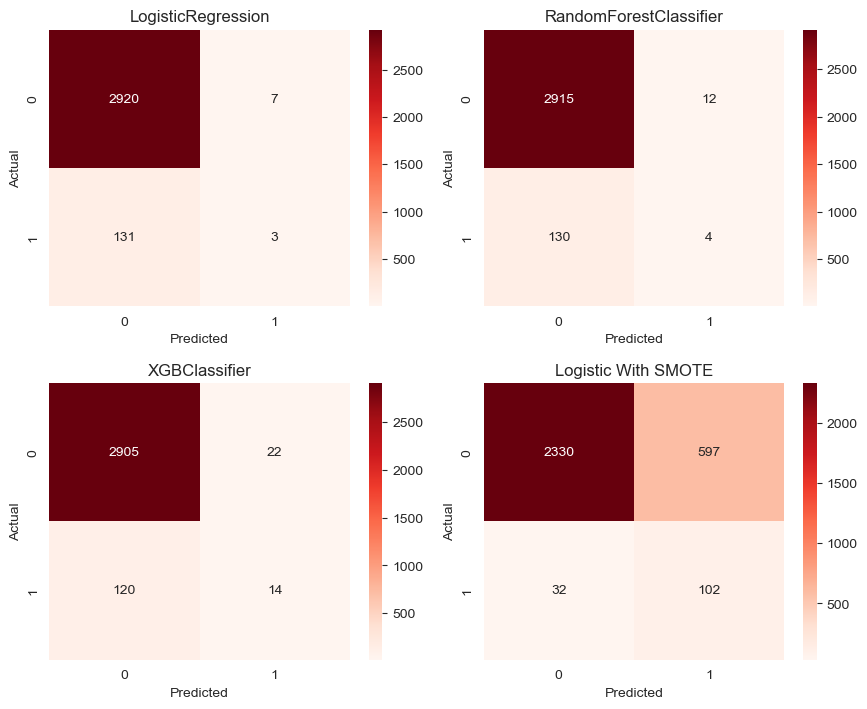

In [78]:
fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (9, 7))
for ax, model_name in zip(axes.ravel(), models_to_plot):
    confusion_mat = confusion_mats[model_name]
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap = 'Reds', ax = ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.subplots_adjust(left=0, right = 0.9, top =0.9, bottom = 0)
plt.show()

In [79]:
# AUC - ROC CURVE Homework
from sklearn.metrics import roc_auc_score, roc_curve, auc
# Precision-recall curve
from sklearn.metrics import PredictionErrorDisplay


In [80]:
# Retrain & Save Model
X_train = train_inputs[numerical_cols + encoded_cols]
y_train = train_df[target_col]

In [81]:
preds = lr_with_smote.predict(X_test)

In [82]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
sub_df = preds

In [84]:
pd.DataFrame(sub_df).to_csv("submission.csv", index = None)

In [85]:
sub_df = pd.read_csv("submission.csv")

In [86]:
sub_df.head()

,0
0,0
1,0
2,0
3,1
4,0


In [87]:
# Make prediction on a single input

sub_df['stroke'] = preds

In [88]:
sub_df

,0,stroke
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
10198,0,0
10199,0,0
10200,0,0
10201,0,0


In [89]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [90]:
single_input = {
    'gender': 'Male', 
    'age': 33, 
    'hypertension':0,
    'heart_disease': 0, 
    'ever_married':'Yes',
    'work_type':'Private',
    'Residence_type':'Urban',
    'avg_glucose_level':79.53,
    'bmi': 31.10,
    'smoking_status': 'formerly smoked'
}

In [91]:
input_df = pd.DataFrame([single_input])

In [92]:
input_df[encoded_cols] = preprocessor.transform(input_df)

In [93]:
 X = input_df[numerical_cols + encoded_cols]

In [94]:
lr_with_smote.predict(X)

array([0], dtype=int64)

In [95]:
import joblib as jb

In [96]:
model = {
    'encoded_cols' : encoded_cols,
    'numeric_cols':numerical_cols,
    'preprocessor': preprocessor,
    'model' : lr_with_smote
}

In [97]:
jb.dump(model,'model.joblib')

['model.joblib']